<a href="https://colab.research.google.com/github/Rohitsingh24-cloud/face-mask-detection-using-cnn/blob/main/face_mask_detection_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data  test1.jpg


In [6]:
import os

In [7]:
import numpy as np

In [8]:
import pandas as pd


In [9]:
import matplotlib.pyplot as plt


In [10]:
import matplotlib.image as mpimg

In [11]:
import cv2

In [12]:
from google.colab.patches import cv2_imshow

In [13]:
import tensorflow

In [14]:
from tensorflow import keras

In [15]:
from PIL import Image

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
with_mask_files=os.listdir('/content/data/with_mask')

In [18]:
without_mask_files=os.listdir('/content/data/without_mask')

In [19]:
with_mask_files[0:5]

['with_mask_1823.jpg',
 'with_mask_3488.jpg',
 'with_mask_718.jpg',
 'with_mask_1761.jpg',
 'with_mask_2364.jpg']

In [20]:
print('number of images with mask file ',len(with_mask_files))

number of images with mask file  3725


In [21]:
print('number of images without mask file ',len(os.listdir('/content/data/without_mask')))

number of images without mask file  3828


In [22]:
with_mask_labels=[1]*3725;


In [23]:
without_mask_labels=[0]*3828;

In [24]:
img=mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')

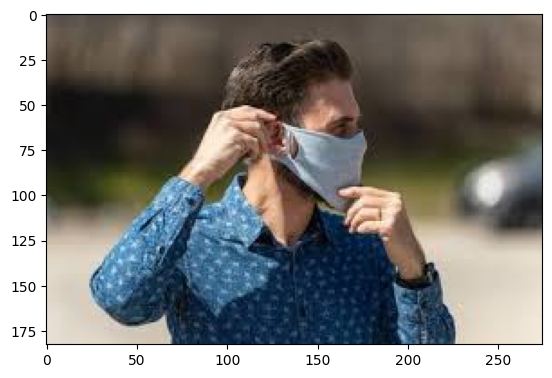

In [25]:
imgplot=plt.imshow(img)

In [26]:
img2=mpimg.imread('/content/data/without_mask/without_mask_2595.jpg')

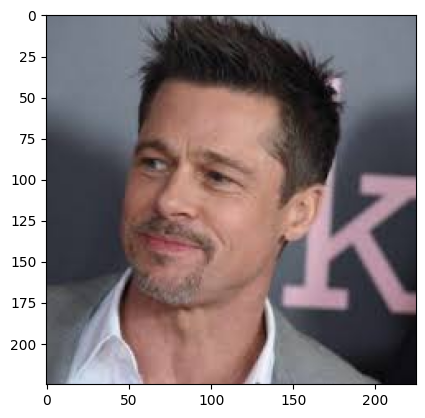

In [27]:
plt.imshow(img2)

In [28]:
#image processing

In [29]:
#resizing the image

In [30]:
with_mask_path='/content/data/with_mask/'

In [31]:
data=[]

In [32]:
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [33]:
without_mask_path='/content/data/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [34]:
len(data)

7553

array([[[253, 254, 240],
        [247, 248, 234],
        [253, 254, 240],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 252, 238],
        [251, 252, 238],
        [254, 254, 241],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 254, 240],
        [252, 253, 239],
        [252, 252, 239],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 31,  31,  29],
        [ 30,  30,  28],
        [ 27,  27,  25],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 25,  25,  23],
        [ 28,  28,  26],
        [ 26,  26,  24],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 10,  10,   8],
        [ 14,  14,  12],
        [ 13,  13,  11],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
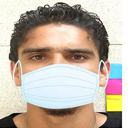

In [35]:
data[0]

In [36]:
data[0].shape

(128, 128, 3)

In [37]:
x=np.array(data)

In [38]:
labels = with_mask_labels + without_mask_labels

In [39]:
y=np.array(labels)

In [40]:
y.shape

(7553,)

In [41]:
x.shape

(7553, 128, 128, 3)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

In [43]:
x_train_scaled=x_train/255

In [44]:
x_test_Scaled=x_test/255

In [45]:

#build a convolutional neural network

In [46]:
from tensorflow.keras.models import Sequential

In [47]:
from tensorflow.keras import models

In [48]:
from tensorflow.keras import layers

In [49]:
num_of_classes=2

In [50]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense

In [51]:
model=keras.Sequential()

In [52]:
model.add(Conv2D(32,kernel_size=(4,4),activation='relu',input_shape=(128,128,3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [54]:
model.add(Conv2D(16,kernel_size=(4,4),activation='relu'))

In [55]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [56]:
model.add(Flatten())

In [57]:
model.add(Dense(64,activation='relu'))

In [58]:
model.add(Dropout(0.5))

In [59]:
model.add(Dense(32,activation='relu'))

In [60]:
model.add(Dropout(0.5))

In [61]:
model.add(Dense(num_of_classes,activation='sigmoid'))

In [62]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [63]:
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=30)

Epoch 1/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - acc: 0.6662 - loss: 0.6204 - val_acc: 0.8397 - val_loss: 0.3383
Epoch 2/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.8640 - loss: 0.3454 - val_acc: 0.8876 - val_loss: 0.2657
Epoch 3/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.8816 - loss: 0.3022 - val_acc: 0.8860 - val_loss: 0.2592
Epoch 4/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.8946 - loss: 0.2692 - val_acc: 0.8810 - val_loss: 0.3042
Epoch 5/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.9053 - loss: 0.2387 - val_acc: 0.9074 - val_loss: 0.2365
Epoch 6/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.9207 - loss: 0.2150 - val_acc: 0.8992 - val_loss: 0.3018
Epoch 7/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.9231 - loss: 0.1971 - val_acc: 0.9157 - val_loss: 0.2304
Epoch 8/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.9326 - loss: 0.1801 - val_acc: 0.9107 - val_loss: 0.2352
Epoch 9/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms

In [64]:
loss,accuracy=model.evaluate(x_test_Scaled,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9218 - loss: 0.2484


Text(0.5, 0, 'epoch')

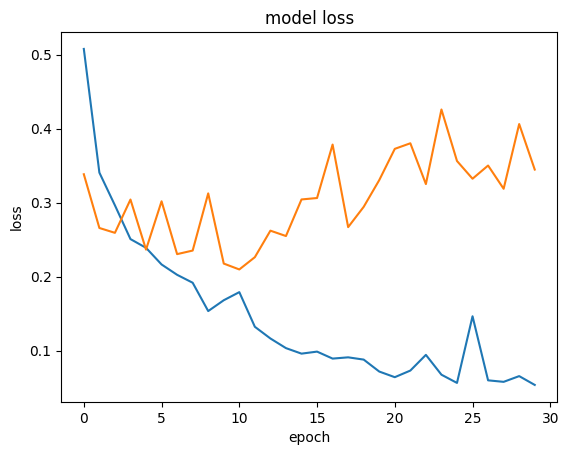

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

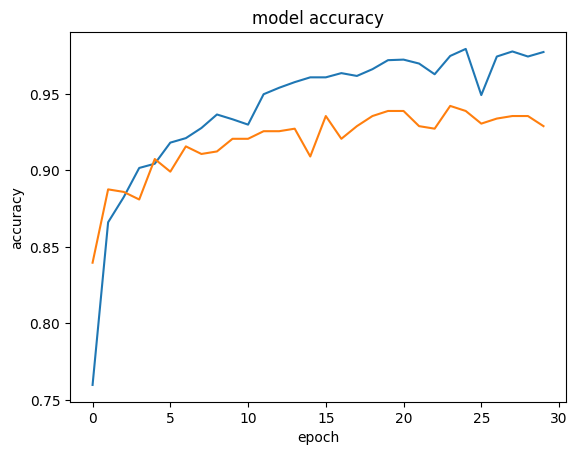

In [66]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [67]:
#make prediction

enter the image path/content/test1.jpg


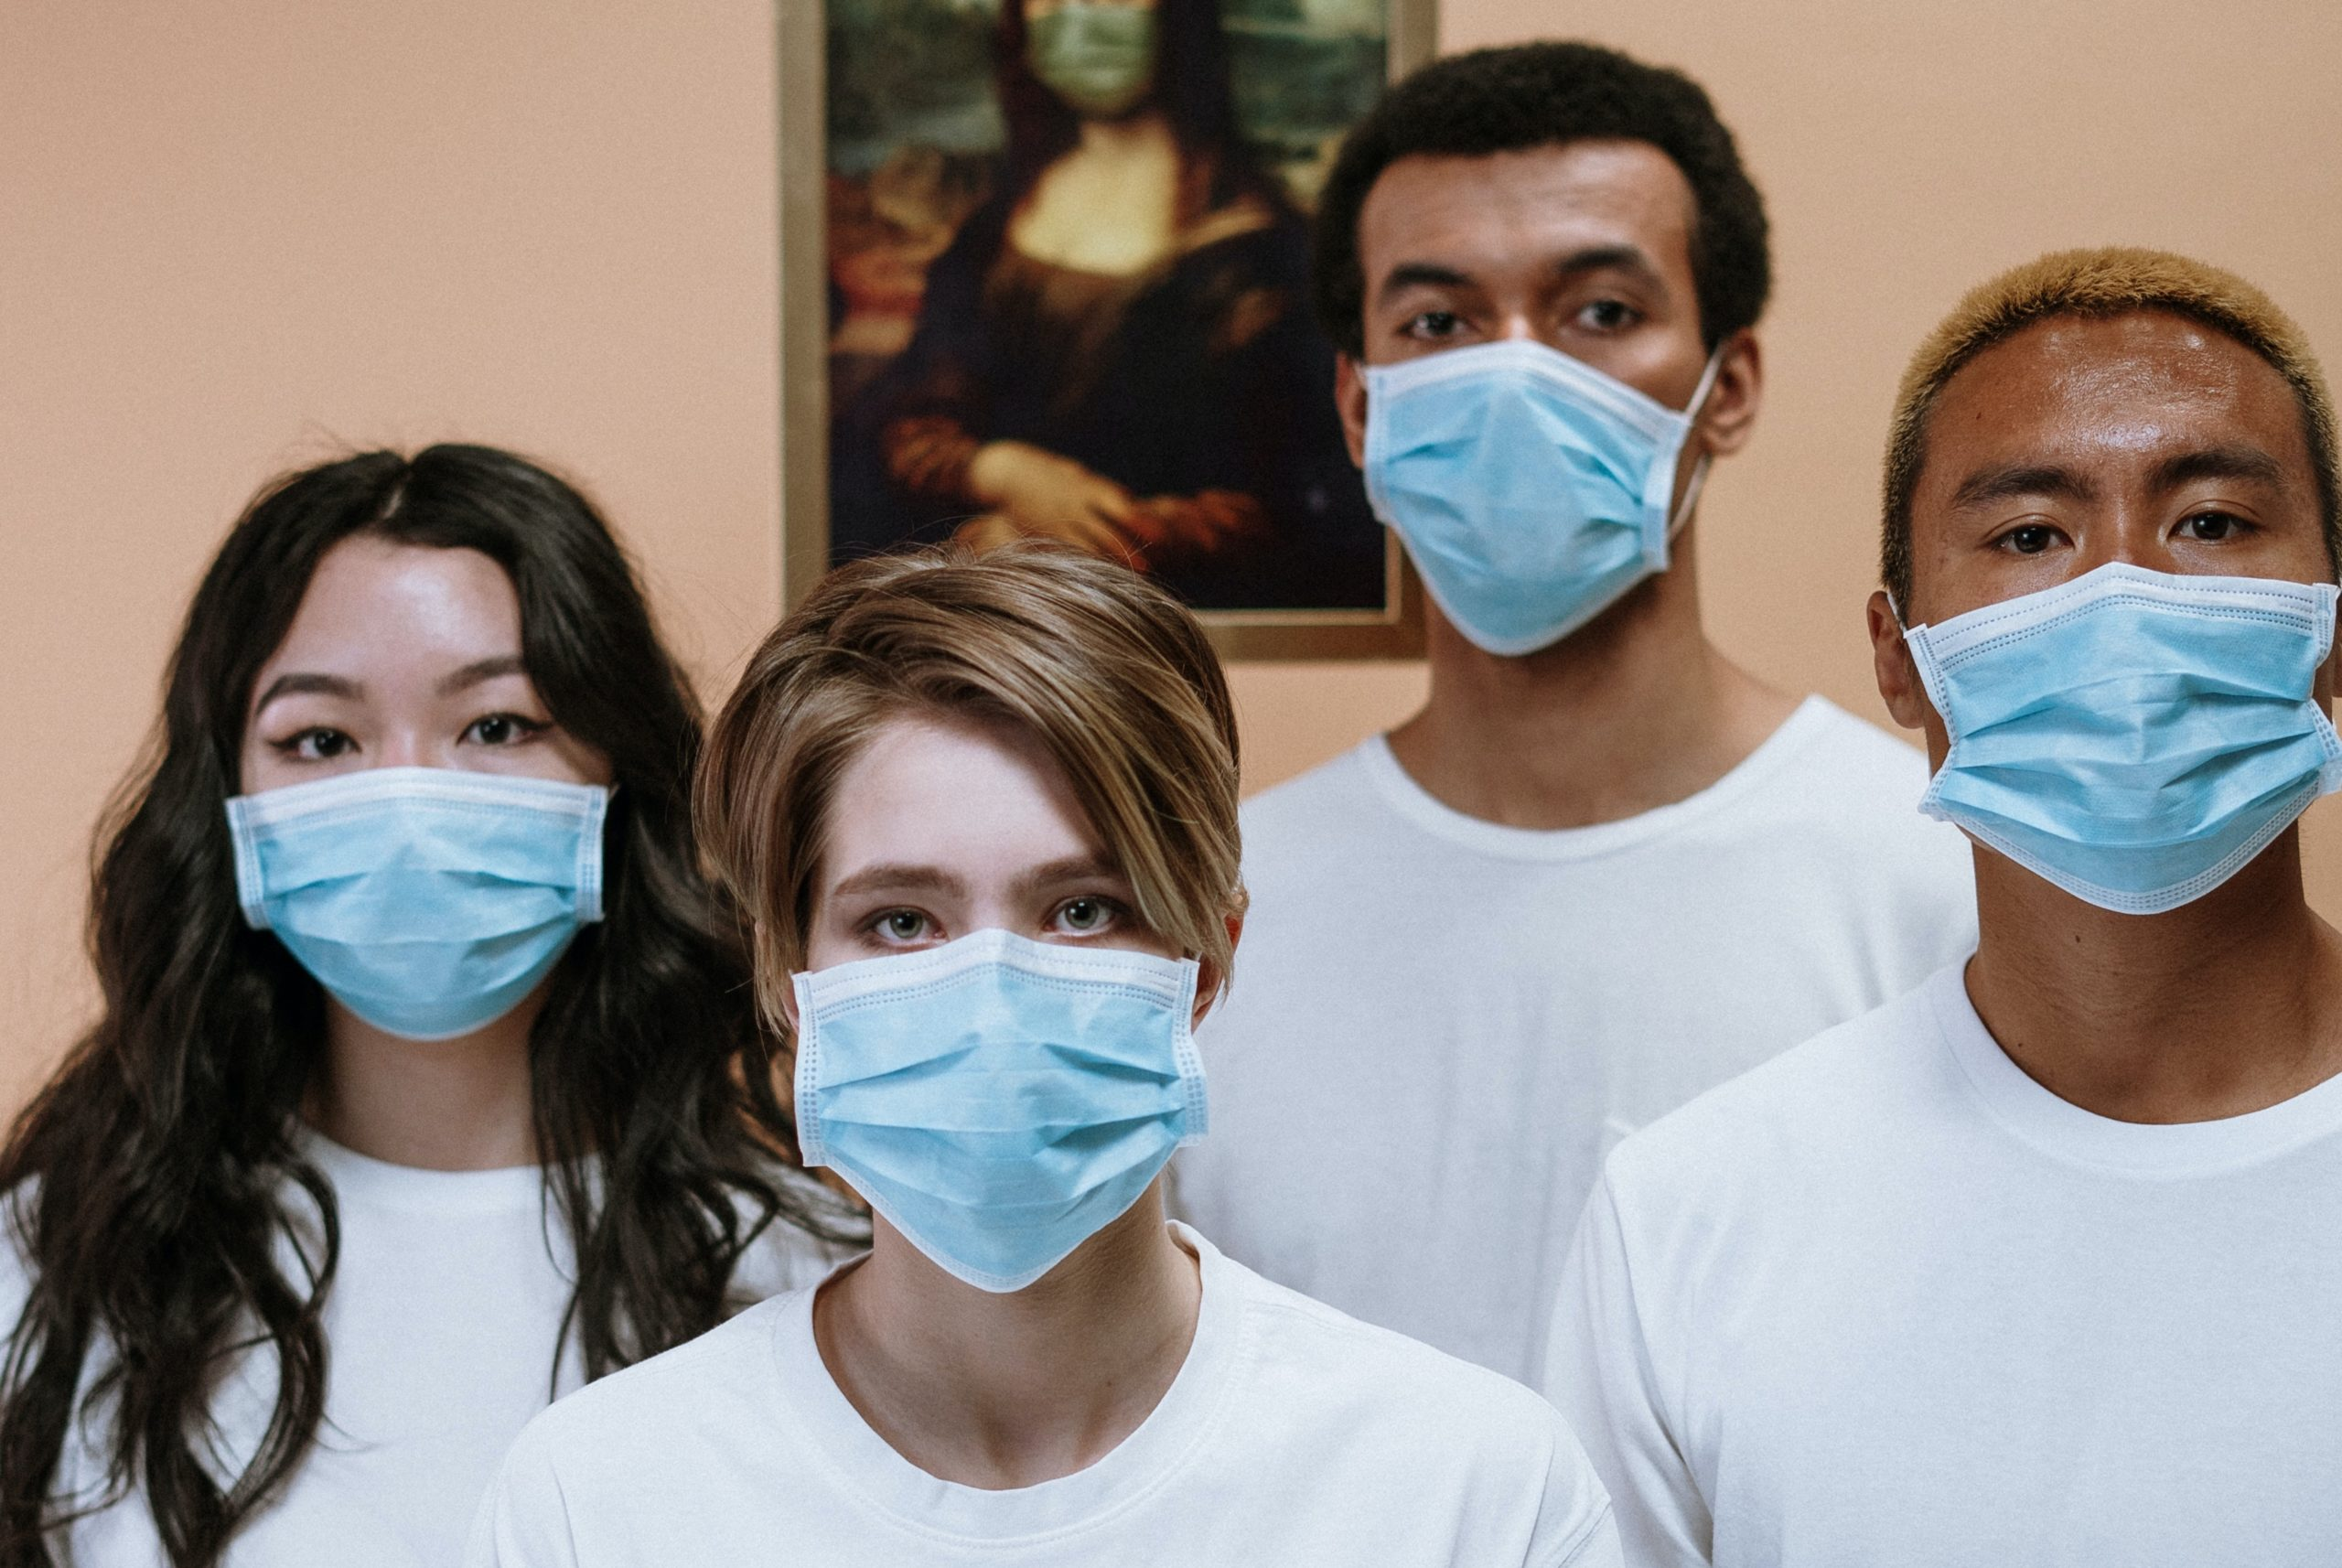

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
[[0.14939903 0.9628965 ]]
the person is wearing mask


In [68]:
input_image_path=input('enter the image path')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
if(input_pred_label==1):
  print('the person is wearing mask')
else:
  print('the person is not wearing mask')